# Andrew Dunn

## Question (Andrew): Is there a high enough concentration of non-metal pollutents to be dangerous to humans.

In this analysis, we will focus on answering this question. If we find that there is a high enough concentration to be dangerous, we will answer a subsequent question of: When is the pollutent that high?

The levels that I we are considering 'Dangerous' for the purposes of this analysis are listed below:

- A concentration of Benzene (C6H6) that qualifies as immediately dangerous to health, according to the CDC, is 1597.34 mg/m^3.<sup>1</sup>

- A concentration of NO2 that is expected to have 50% mortality rate is 327.4mg/m^3. However, it is listed that 37.63 mg/m^3 is expected to be mildly irritating.<sup>2</sup>

- A concentration of C0 that qualifies as immediately dangerous is 20mg/m^3.<sup>3</sup>

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sys.path.append(os.getcwd())
%load_ext autoreload
%autoreload 2
from project_functions3 import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
np.__version__


'1.23.4'

# EDA

In [117]:
data = load_and_process("../data/raw/AirQuality.csv")
display(data)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


10.083105327549774
Mean benzene: 10.08 mg/m^3.
Mean NO2: 113.09 mg/m^3.
Mean CO: 2.15 mg/m^3.


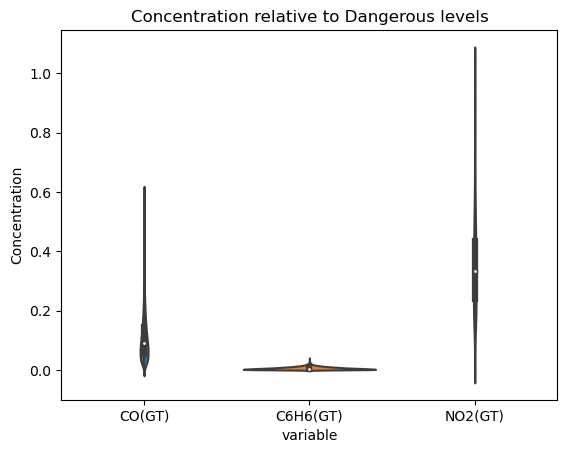

In [118]:
dNonMetal = createNonMetaldf(data)

dNonMetalMelt = dNonMetal.melt(id_vars=['Date'], value_vars=['CO(GT)', 'C6H6(GT)', 'NO2(GT)'])
myVPlot = sns.violinplot(x='variable', y='value', data=dNonMetalMelt)
myVPlot.set_title("Concentration relative to Dangerous levels")
myVPlot.set_ylabel("Concentration")

means = getMeans(data)
print(f"Mean benzene: {round(means[0], 2)} mg/m^3.")
print(f"Mean NO2: {round(means[1], 2)} mg/m^3.")
print(f"Mean CO: {round(means[2], 2)} mg/m^3.")

Concentration of each non-metal particulate measured, relative to dangerous levels as described by the CDC. A value of 1 is equal to what is considered dangerous. As we can see the value of NO2 is both the most volatile and the only particle that was recorded at a dangerous level in this timeframe.

### We see that NO2 shows the possibility of having a high enough concentration to be dangerous to humans, therefore we will focus on when and how often was the concentration dangerous.

,Date,CO(GT),C6H6(GT),NO2(GT)
7913,03/02/2005,0.175,0.009706,1.018349
8110,11/02/2005,0.355,NaN,1.039755


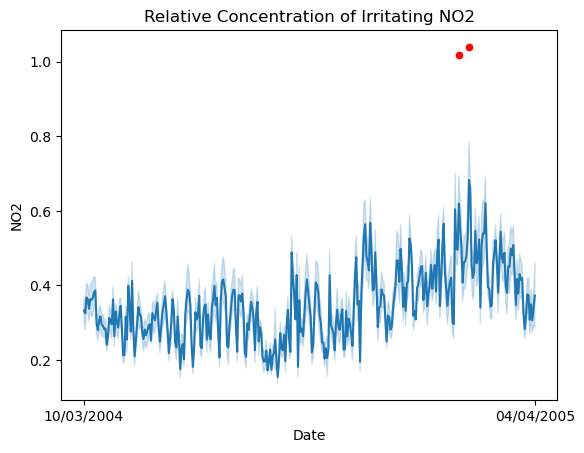

In [119]:
dIrritating = dNonMetal[(dNonMetal["NO2(GT)"] >= 0.115)]
dDangerous = dIrritating[(dIrritating["NO2(GT)"] >= 1)]

di = sns.lineplot(x='Date', y='NO2(GT)', data=dIrritating)
di.set_xticks([0,len(di.get_xticks())-1])
di.set_title("Relative Concentration of Irritating NO2")
di.set_ylabel("NO2")
dd = sns.scatterplot(data=dDangerous, x='Date', y='NO2(GT)', color='red')
dDangerous


This shows the days when the concentration of NO2 is considered an irritant, and the days that is imminently dangerous in red.

Text(0.5, 0, 'Time (24H)')

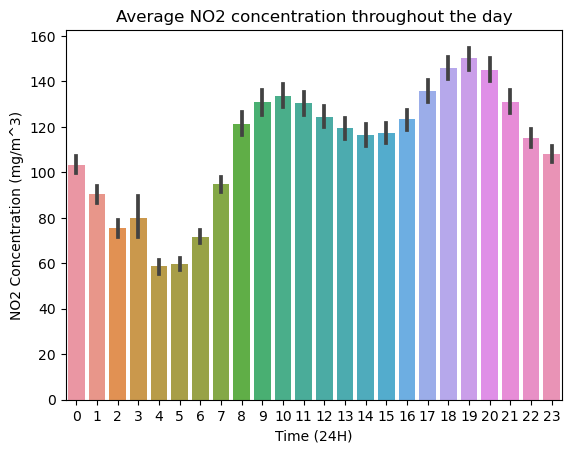

In [120]:
timePlot = sns.barplot(data=data, x='Time', y='NO2(GT)')
timePlot.set_title('Average NO2 Concentration Throughout the Day')
timePlot.set_ylabel('NO2 Concentration (mg/m^3)')
timePlot.set_xlabel('Time (24H)')

c:\Users\coold\miniconda3\envs\myenv\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\coold\miniconda3\envs\myenv\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


Text(0.5, 24.0, 'Time (24H)')

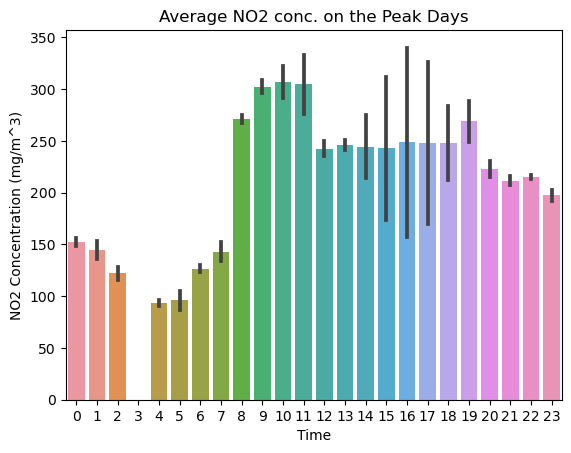

In [124]:
immDays = getImmDays(data) 
immPlot = sns.barplot(data=immDays, x='Time', y='NO2(GT)')
immPlot.set_title('Average NO2 conc. on the Peak Days')
immPlot.set_ylabel('NO2 Concentration (mg/m^3)')
timePlot.set_xlabel('Time (24H)')

There are two days in which the peak NO2 concentration breaches the listed dangerous level. This graph shows the average value per hour on specifically those days. We notice that the peak times are around 10am possibly around 4pm. However the margin for error is significantly larger at 4pm. 

 ### Question: Is there a high enough concentration of non-metal pollutents to be dangerous.
 
 #### Conclusion
 There is no expected dangerous days for either C6H6 (Benzene) or CO (Carbon Monoxide) concentration. There is data to show that concentrations of NO2 (Nitrogen Dioxide) are high enough to be irritating, and dangerous on rare days.

 ### Question 2: When and how frequently are levels of NO2 considered dangerous.

 #### Conclusion
 It is quite frequent to have a concentration of NO2 that is considered an irritant. So much so that average values throughout the year at any point in the day exceed levels that are considered irritating. 
 
 On top of that there are two days throughout the year that was recorded where the concentration of NO2 was high enough to be considered dangerous. Interestingly, both days were later in the year: 03/02/2005 and 11/02/2005 (the year recorded went from 10/03/2004 to 04/04/2005). Possibly suggesting an increase over time. In order to check that we would need follow up data from a later year. On those days the time of day with the highest concentration was approximately 10am. However, when considering the whole year, there were two peak times of day, which were 10am and the higher peak at 7pm.<sup>2</sup>

### References:

1: https://www.cdc.gov/niosh/idlh/71432.html

2: https://www.cdc.gov/niosh/idlh/10102440.html

3: https://www.cdc.gov/niosh/idlh/7440484.html